In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [4]:
# 그래프에서 선의 종류
linestyles = ['-', '--', ':']

In [5]:
def E( X, g = lambda x: x):
    x_range, f = X
    def integrand ( x ):
        return g( x ) * f ( x )

    return integrate.quad ( integrand, -np.inf, np.inf ) [ 0 ]                     

In [6]:
def V( X, g = lambda x: x):
    x_range, f = X
    mean = E( X, g)
    def integrand ( x ):
        return  (g( x ) - mean )**2 * f (x )
    return integrate.quad ( integrand, -np.inf, np.inf ) [ 0 ]   

In [7]:
def check_prob (X):
    x_range , f= X

    f_min = minimize_scalar( f ).fun
    assert f_min >=0 , ' 확률함수가 마이너스 값을 가짐'
    prob_sum = np.round ( integrate.quad ( f, -np.inf, np.inf) [0],6)
    assert prob_sum == 1, f'확률의 합이 1이 아닌 다음의 값임:{prob_sum}'
    print ( f'expected value {E(X):.3f}')
    print ( f'variance { V(X):.3f}')


In [8]:
def plot_prob( X , x_min, x_max ):
    x_range, f = X
    def F(x):
        return integrate.quad ( f, -np.inf, x) [0]

    xs = np.linspace (x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    ax.plot ( xs, [ f(x) for x in xs],
              label = 'f(x)', color = 'gray')
    ax.plot ( xs, [ F(x) for x in xs],
              label = 'F(x)', ls= '--' , color = 'red')
    
    ax.legend()
    plt.show()

In [9]:
# 지수분포
# 어떤 사건이 발생하는 간격이 따르는 분포 ( 간격이란 시간이 따르는 분포 )
#   지수 분포는 단위시간당 평균 lambda번 발생하는 사건에 대해 
#   단위시간당 사건이 발생하는 횟수가 따르는 Poi (lambda)가 되고
#   사건의 발생 간격이 따르는 것이  Ex (lambda)가 된다.

def Ex( lam ):
    x_range = [ 0, np.inf]
    def f(x):
        if x >= 0:
             return lam * np.exp ( -lam * x)
        else:
            return 0
    return  x_range, f

In [10]:
lam = 3
X = Ex (lam)

expected value 0.333
variance 0.111


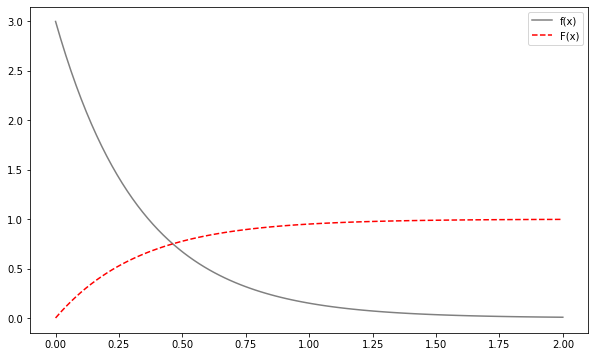

In [20]:
check_prob(X)
plot_prob ( X, 0, 2)

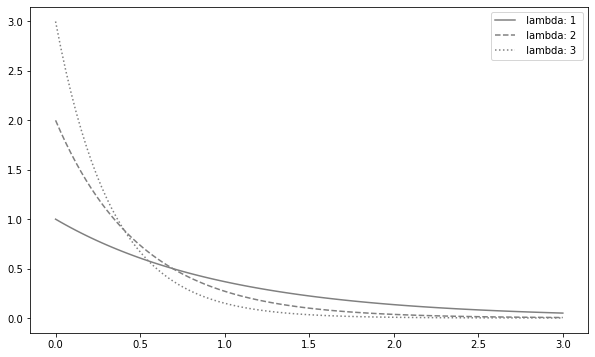

In [21]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    xs = np.linspace ( 0, 3, 100)
    for lam, ls in zip( [1, 2, 3], linestyles):
        rv = stats.expon ( scale = 1/lam ) 
        ax.plot ( xs, rv.pdf (xs),
                 label = f' lambda: {lam} ', ls=ls, color ='gray')
    ax.legend()
    
    plt.show()